In [9]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

import rtmtools.lblrtm.aerutils as aerutils
importlib.reload(aerutils)
import rtmtools.clirad.sw.wrangle as cliradwrangle
importlib.reload(cliradwrangle)
import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
importlib.reload(rrtmgwrangle)

import climatools.offline_scripts.intermodel as scripts_intermodel
importlib.reload(scripts_intermodel)

<module 'climatools.offline_scripts.intermodel' from '/nuwa_cluster/home/jackyu/climatools/climatools/offline_scripts/intermodel.py'>

In [17]:
name_molecule = r'H2O'

In [ ]:
#### Load CRD results

In [3]:
# Get lbl line-by-line results
pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples',
                           'lbl_H2008_h2O_cut25/OUTPUT_RADSUM')

pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
                                                cooling_rate=True,
                                                signed_fluxes=True)

In [13]:
# H1996 cutoff = 10 cm-1
pathout_crd1 = os.path.join('/nuwa_cluster/home/jackyu',
                            'radiation/crd/LW/examples',
                            'lbl_H1996_H2O_cut10/OUTPUT_RADSUM')

pnl_crd1 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd1, 
                                                 cooling_rate=True, 
                                                 signed_fluxes=True)

In [ ]:
#### Load CLIRAD results

In [126]:
# Read OUTPUT_CLIRAD.dat
pathout_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                              'radiation/clirad/LW/examples',
                              'mls75_H2O_H2012/OUTPUT_CLIRAD.dat')

pnl_clirad = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad, 
                                                        cooling_rate=True, 
                                                        signed_fluxes=True)


In [124]:
pathout_clirad_96 = os.path.join('/nuwa_cluster/home/jackyu',
                                 'radiation/clirad/LW/examples',
                                 'mls75_H2O/OUTPUT_CLIRAD.dat')

pnl_clirad_96 = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad_96,
                                                           cooling_rate=True, 
                                                           signed_fluxes=True)

In [15]:
# prepare results Hitran 2012 updated version
def path_cliradlw_h2012():
    return '../clirad/LW/examples/mls75_H2O_H2012/CLIRAD_IR_output.dat'


def get_rateT(df, ratename = 'cooling rates'):
    return pd.DataFrame({'pressure': .5 * (df['p'].values[1:] + df['p'].values[: -1]),
                    ratename: df[ratename].values[1:]})


df = cliradwrangle.output_txtfile_to_DataFrame(path_cliradlw_h2012())

rateT_clirad2012 = get_rateT(df, ratename = 'cooling rates')

In [ ]:
#### Load LBLRTM results

In [4]:
# Get AER line-by-line results
pathout_lblrtm = os.path.join('/nuwa_cluster/home/jackyu',
                              'line_by_line/aerlbl_v12.2_package',
                              'runs/LW/run_mls75pro_H2O/OUTPUT_RADSUM')
pnl_lblrtm = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_lblrtm, 
                                                   signed_fluxes=True,
                                                   cooling_rate=True)



In [5]:
path_file = os.path.join('/nuwa_cluster/home/jackyu',
                         'line_by_line/aerlbl_v12.2_package/runs/LW',
                         'run_mls70pro_H2O_cont/OUTPUT_RADSUM')

pnl_lblrtm_cont = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=path_file,
                                                        signed_fluxes=True,
                                                        cooling_rate=True)

In [ ]:
#### Load RRTMG results

In [5]:
# load results for no continuum

fpath = os.path.join('/nuwa_cluster/home/jackyu/radiation/',
                     'rrtmg/LW/examples/mls70_H2O/OUTPUT_RRTM')

pnl_rrtmg = rrtmgwrangle\
.OUTPUT_RRTM_to_pandasPanel(readfrom=fpath, 
                            signed_fluxes=True, 
                            cooling_rate=True)

In [7]:
# load results for when there is continuum

fpath = os.path.join('/nuwa_cluster/home/jackyu/radiation/',
                     'rrtmg/LW/examples/mls70_H2O_cont/OUTPUT_RRTM')

pnl_rrtmg_cont = rrtmgwrangle\
.OUTPUT_RRTM_to_pandasPanel(readfrom=fpath,
                            signed_fluxes=True, 
                            cooling_rate=True)

# Whole spectral range

LBLRTM cont
     pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.0024 -324.106591    0.000000 -324.106591      0.000000
30   299.8000 -329.165636   32.928977 -296.236659      2.189773
0   1013.0000 -423.532488  332.872313  -90.660175      3.114214

LBLRTM no cont
     pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.0024 -335.176214    0.000000 -335.176214      0.000000
30   299.8000 -339.805305   31.105327 -308.699977      2.098117
0   1013.0000 -423.532488  272.902015 -150.630473      1.766477

LBLRTM cont - LBLRTM no cont
    pressure    flux_up  flux_down   net_flux  cooling_rate
70         0  11.069623   0.000000  11.069623      0.000000
30         0  10.639668   1.823650  12.463319      0.091656
0          0   0.000000  59.970298  59.970298      1.347737



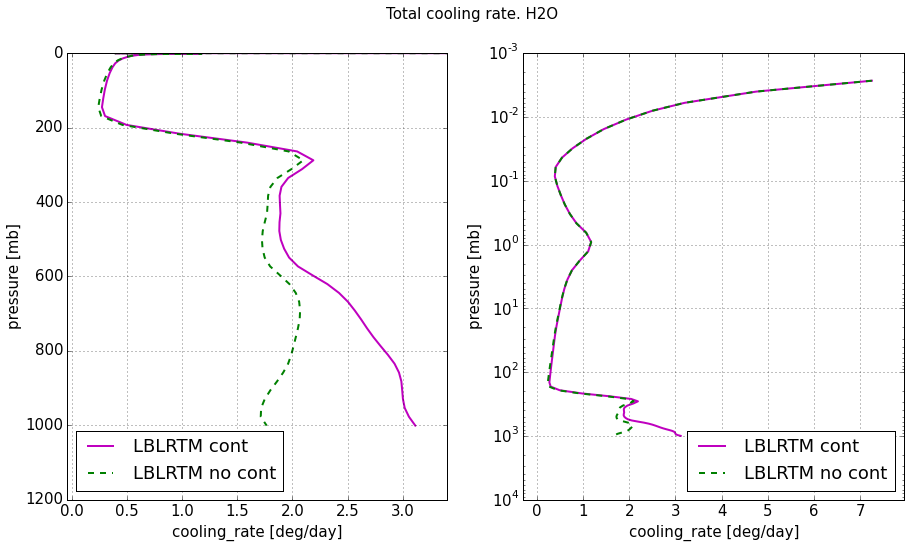

In [18]:
scripts_intermodel.lw_results_all_wavenumbers(
    name_molecule=name_molecule,
    infos_wavenumber=[('LBLRTM cont', 'm', '-', pnl_lblrtm_cont),
                      ('LBLRTM no cont', 'g', '--', pnl_lblrtm)])

# In RRTMG's wavenumber bands

Flux tables and cooling rates in RRTMG spectral bands


RRTMG-LW. Spectral band 1. 10.0 ~ 350.0 cm-1

LBLRTM cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -36.301023   0.000000 -36.301023      0.000000
30   299.8000 -38.748098  23.423339 -15.324759      1.380549
0   1013.0000 -54.581667  54.657800   0.076133      0.029796

LBLRTM no cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -36.723339   0.000000 -36.723339      0.000000
30   299.8000 -38.985445  22.030611 -16.954833      1.334082
0   1013.0000 -54.581667  54.656241   0.074573      0.030404

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.422316   0.000000  0.422316      0.000000
30         0  0.237347   1.392727  1.630074      0.046468
0          0  0.000000   0.001559  0.001559     -0.000608



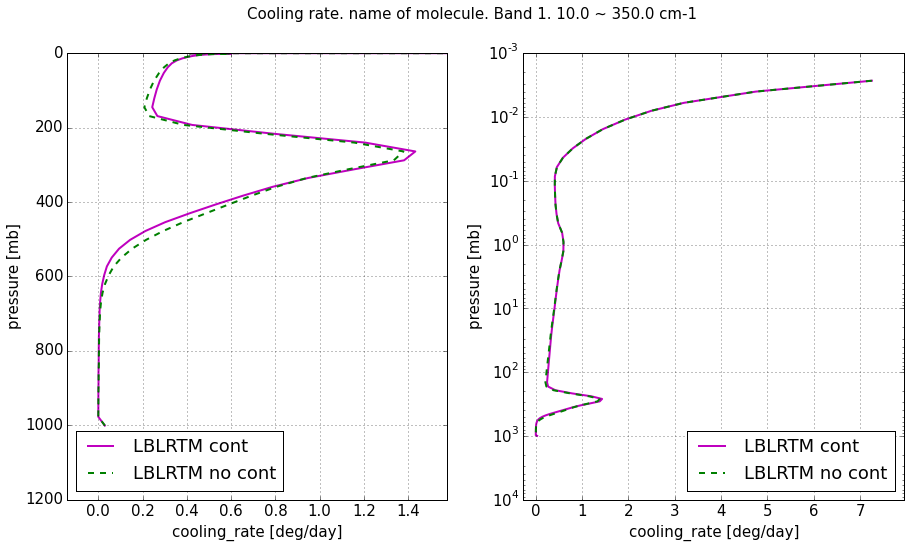


------------------------------------------------------------------------

RRTMG-LW. Spectral band 2. 350.0 ~ 500.0 cm-1

LBLRTM cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -43.016802   0.000000 -43.016802      0.000000
30   299.8000 -43.957602   5.850447 -38.107155      0.542133
0   1013.0000 -60.917465  60.859428  -0.058037      0.029046

LBLRTM no cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -44.312334   0.000000 -44.312334      0.000000
30   299.8000 -45.185905   5.581554 -39.604351      0.506829
0   1013.0000 -60.917465  60.568471  -0.348993      0.074194

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  1.295533   0.000000  1.295533      0.000000
30         0  1.228303   0.268893  1.497196      0.035303
0          0  0.000000   0.290956  0.290956     -0.045148



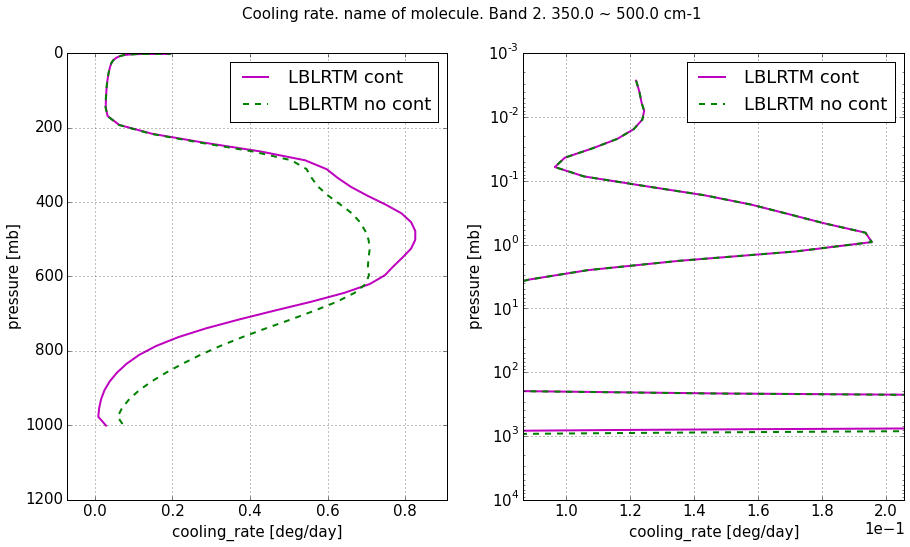


------------------------------------------------------------------------

RRTMG-LW. Spectral band 3. 500.0 ~ 630.0 cm-1

LBLRTM cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -45.170443   0.000000 -45.170443      0.000000
30   299.8000 -45.491501   1.301677 -44.189824      0.131826
0   1013.0000 -58.646623  57.900415  -0.746208      0.157460

LBLRTM no cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -47.012150   0.000000 -47.012150      0.000000
30   299.8000 -47.309167   1.253733 -46.055434      0.126809
0   1013.0000 -58.646623  53.244945  -5.401678      0.367988

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  1.841707   0.000000  1.841707      0.000000
30         0  1.817666   0.047944  1.865610      0.005017
0          0  0.000000   4.655470  4.655470     -0.210528



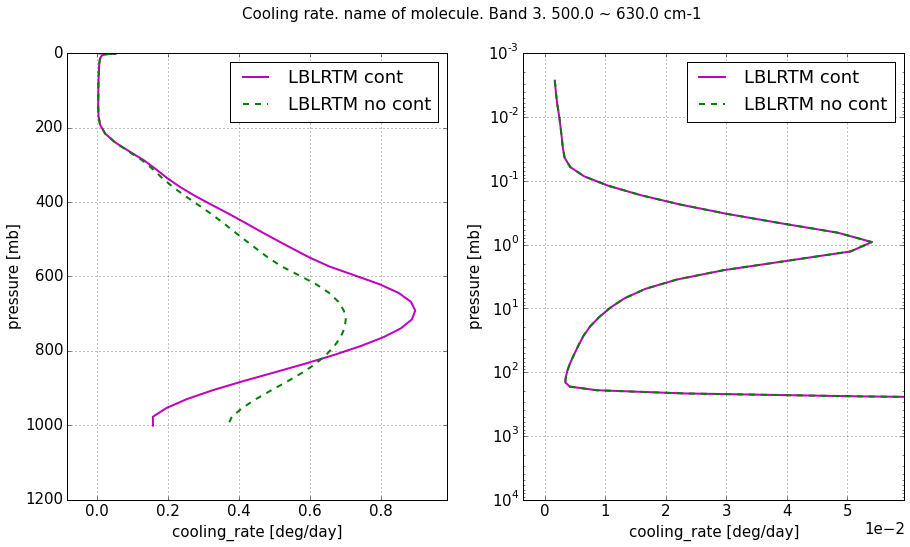


------------------------------------------------------------------------

RRTMG-LW. Spectral band 4. 630.0 ~ 700.0 cm-1

LBLRTM cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -25.825730   0.000000 -25.825730      0.000000
30   299.8000 -25.890119   0.180987 -25.709133      0.019357
0   1013.0000 -30.895458  28.254800  -2.640657      0.297690

LBLRTM no cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -27.048460   0.000000 -27.048460      0.000000
30   299.8000 -27.107277   0.174463 -26.932814      0.019042
0   1013.0000 -30.895458  20.365852 -10.529606      0.291866

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  1.222730   0.000000  1.222730      0.000000
30         0  1.217158   0.006524  1.223682      0.000315
0          0  0.000000   7.888948  7.888948      0.005824



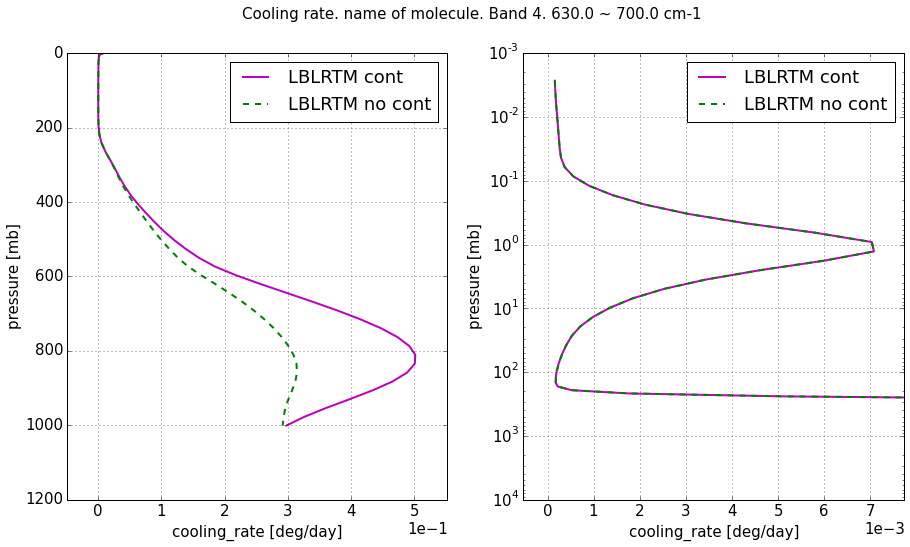


------------------------------------------------------------------------

RRTMG-LW. Spectral band 5. 700.0 ~ 820.0 cm-1

LBLRTM cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -43.995133   0.000000 -43.995133      0.000000
30   299.8000 -44.028875   0.061136 -43.967739      0.005380
0   1013.0000 -48.886744  34.796978 -14.089766      0.791197

LBLRTM no cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -45.956634   0.000000 -45.956634      0.000000
30   299.8000 -45.986205   0.057718 -45.928487      0.005441
0   1013.0000 -48.886744  17.071499 -31.815245      0.361913

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down   net_flux  cooling_rate
70         0  1.961501   0.000000   1.961501      0.000000
30         0  1.957330   0.003418   1.960748     -0.000061
0          0  0.000000  17.725479  17.725479      0.429284



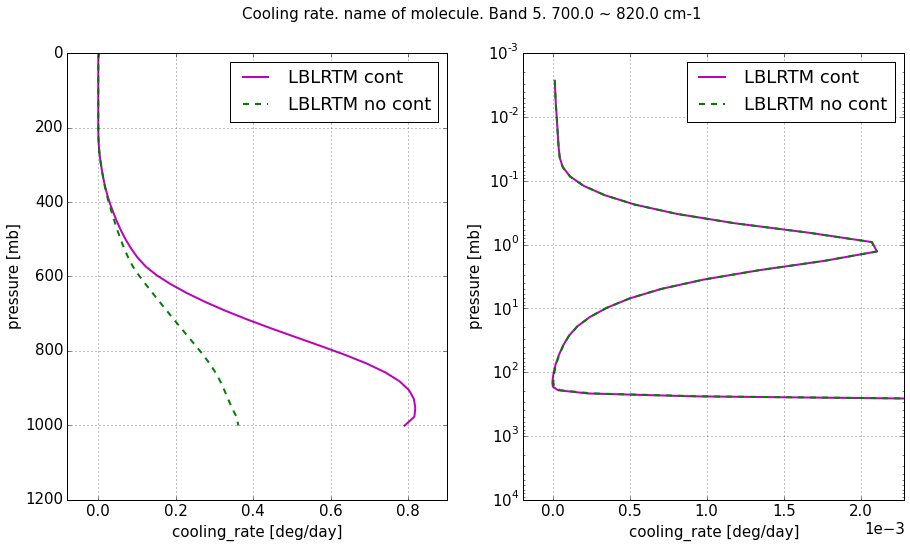


------------------------------------------------------------------------

RRTMG-LW. Spectral band 6. 820.0 ~ 980.0 cm-1

LBLRTM cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -51.288714   0.000000 -51.288714      0.000000
30   299.8000 -51.295627   0.005365 -51.290262     -0.000161
0   1013.0000 -53.960338  23.520851 -30.439487      0.866116

LBLRTM no cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -53.022931   0.000000 -53.022931      0.000000
30   299.8000 -53.028271   0.004477 -53.023794     -0.000042
0   1013.0000 -53.960338   5.960443 -47.999895      0.168585

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down   net_flux  cooling_rate
70         0  1.734217   0.000000   1.734217      0.000000
30         0  1.732644   0.000888   1.733532     -0.000119
0          0  0.000000  17.560408  17.560408      0.697531



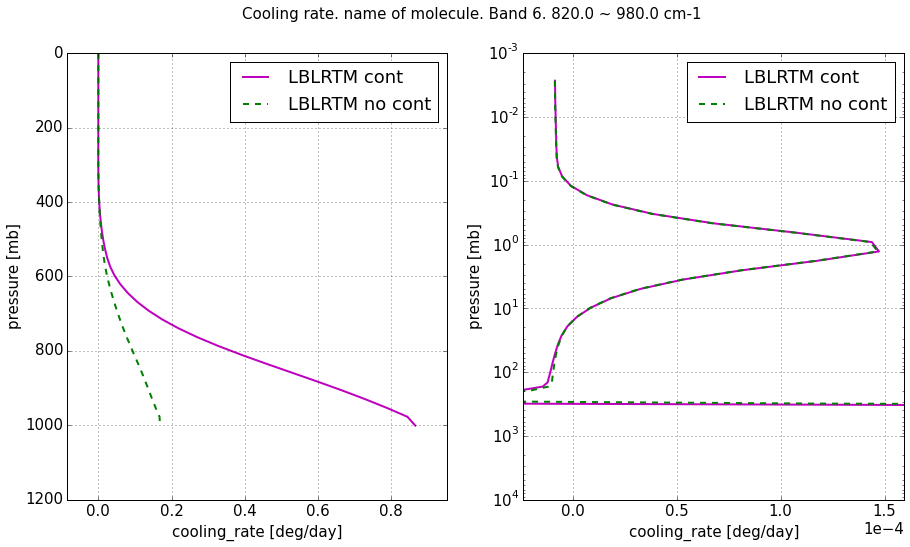


------------------------------------------------------------------------

RRTMG-LW. Spectral band 7. 980.0 ~ 1080.0 cm-1

LBLRTM cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -25.678841   0.000000 -25.678841      0.000000
30   299.8000 -25.680858   0.001201 -25.679658     -0.000119
0   1013.0000 -26.640246   7.930368 -18.709877      0.335016

LBLRTM no cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -26.267006   0.000000 -26.267006      0.000000
30   299.8000 -26.268713   0.001066 -26.267647     -0.000084
0   1013.0000 -26.640246   2.184222 -24.456024      0.067453

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.588164   0.000000  0.588164      0.000000
30         0  0.587854   0.000135  0.587989     -0.000036
0          0  0.000000   5.746147  5.746147      0.267562



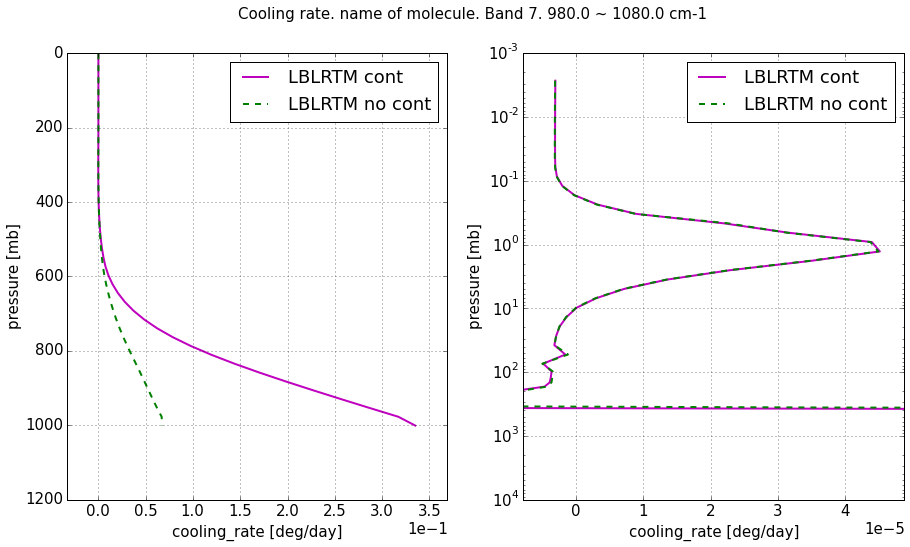


------------------------------------------------------------------------

RRTMG-LW. Spectral band 8. 1080.0 ~ 1180.0 cm-1

LBLRTM cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -20.176559   0.000000 -20.176559      0.000000
30   299.8000 -20.184210   0.007066 -20.177144      0.000042
0   1013.0000 -21.522739   7.523078 -13.999660      0.256268

LBLRTM no cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -20.539627   0.000000 -20.539627      0.000000
30   299.8000 -20.547063   0.006978 -20.540085      0.000067
0   1013.0000 -21.522739   4.351903 -17.170835      0.111439

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.363068   0.000000  0.363068      0.000000
30         0  0.362853   0.000089  0.362941     -0.000025
0          0  0.000000   3.171175  3.171175      0.144830



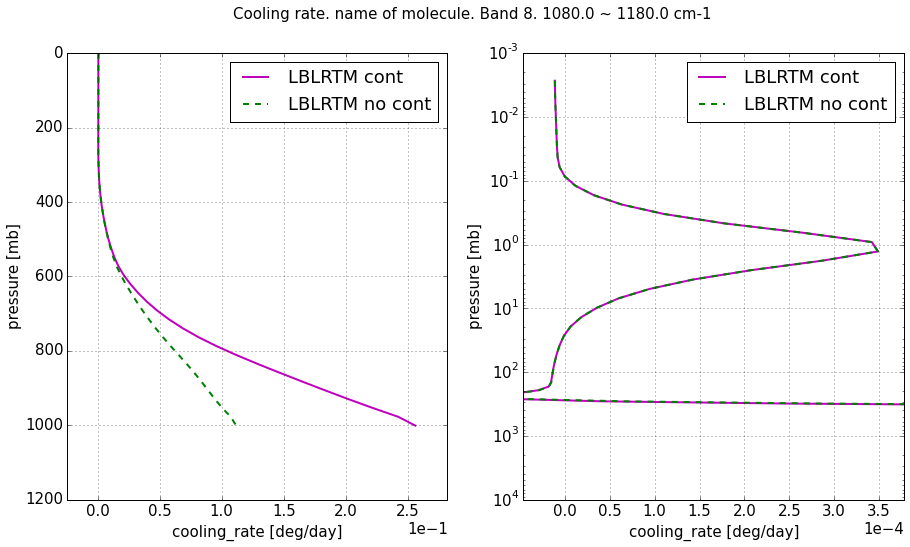


------------------------------------------------------------------------

RRTMG-LW. Spectral band 9. 1180.0 ~ 1390.0 cm-1

LBLRTM cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -21.854930   0.000000 -21.854930      0.000000
30   299.8000 -22.012700   0.244047 -21.768653      0.013168
0   1013.0000 -31.299603  24.147604  -7.151999      0.297508

LBLRTM no cont
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -22.383453   0.000000 -22.383453      0.000000
30   299.8000 -22.535776   0.239734 -22.296042      0.013208
0   1013.0000 -31.299603  22.000981  -9.298622      0.247393

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.528523   0.000000  0.528523      0.000000
30         0  0.523075   0.004313  0.527389     -0.000040
0          0  0.000000   2.146623  2.146623      0.050115



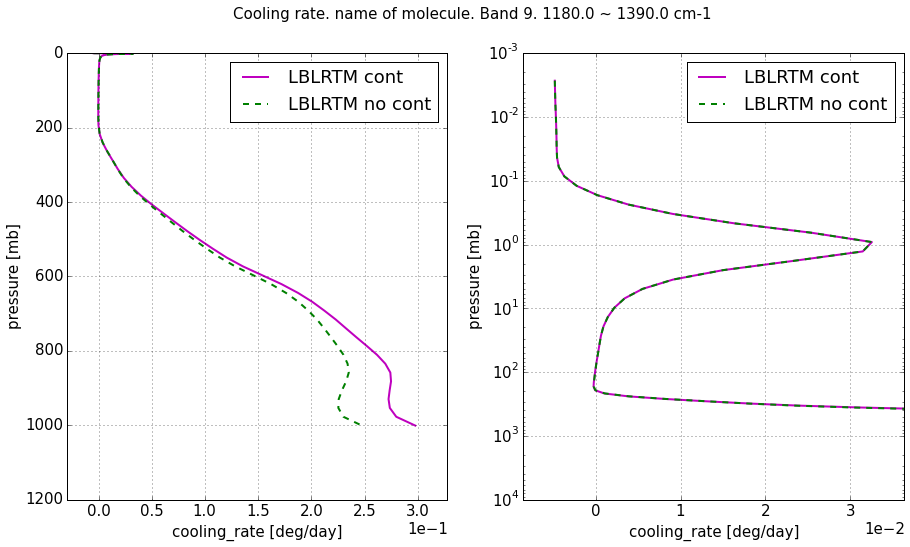


------------------------------------------------------------------------

RRTMG-LW. Spectral band 10. 1390.0 ~ 1480.0 cm-1

LBLRTM cont
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -2.403198   0.000000 -2.403198      0.000000
30   299.8000 -2.651217   0.471465 -2.179752      0.028080
0   1013.0000 -8.898490   8.883177 -0.015313      0.002887

LBLRTM no cont
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -2.543163   0.000000 -2.543163      0.000000
30   299.8000 -2.778233   0.450082 -2.328151      0.026121
0   1013.0000 -8.898490   8.879336 -0.019154      0.004226

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.139965   0.000000  0.139965      0.000000
30         0  0.127015   0.021384  0.148399      0.001959
0          0  0.000000   0.003841  0.003841     -0.001340



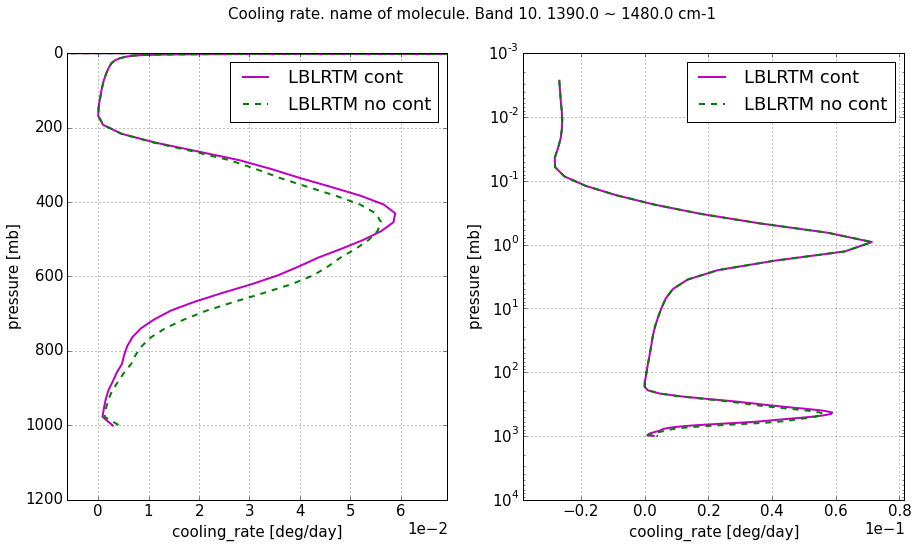


------------------------------------------------------------------------

RRTMG-LW. Spectral band 11. 1480.0 ~ 1800.0 cm-1

LBLRTM cont
     pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.0024  -3.053903   0.000000 -3.053903      0.000000
30   299.8000  -3.745125   1.319829 -2.425296      0.072665
0   1013.0000 -17.882889  17.863237 -0.019652      0.000934

LBLRTM no cont
     pressure    flux_up  flux_down  net_flux  cooling_rate
70     0.0024  -3.362121   0.000000 -3.362121      0.000000
30   299.8000  -4.019593   1.248877 -2.770716      0.065686
0   1013.0000 -17.882889  17.851415 -0.031474      0.004635

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.308217   0.000000  0.308217      0.000000
30         0  0.274468   0.070952  0.345420      0.006979
0          0  0.000000   0.011822  0.011822     -0.003701



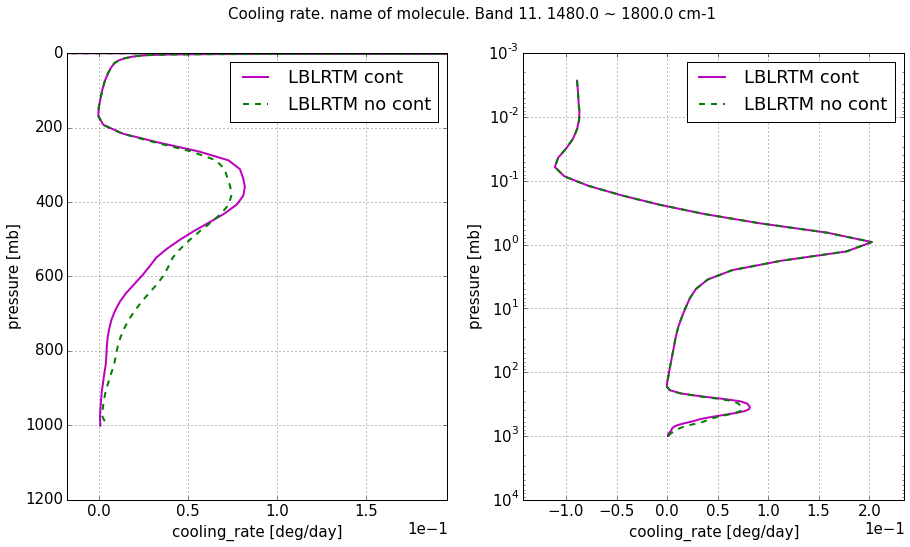


------------------------------------------------------------------------

RRTMG-LW. Spectral band 12. 1800.0 ~ 2080.0 cm-1

LBLRTM cont
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -2.614266   0.000000 -2.614266      0.000000
30   299.8000 -2.665112   0.057645 -2.607467      0.000946
0   1013.0000 -5.957771   5.370144 -0.587627      0.017146

LBLRTM no cont
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -2.786328   0.000000 -2.786328      0.000000
30   299.8000 -2.834016   0.055757 -2.778259      0.001067
0   1013.0000 -5.957771   5.179354 -0.778417      0.019002

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.172062   0.000000  0.172062      0.000000
30         0  0.168904   0.001888  0.170792     -0.000121
0          0  0.000000   0.190791  0.190791     -0.001856



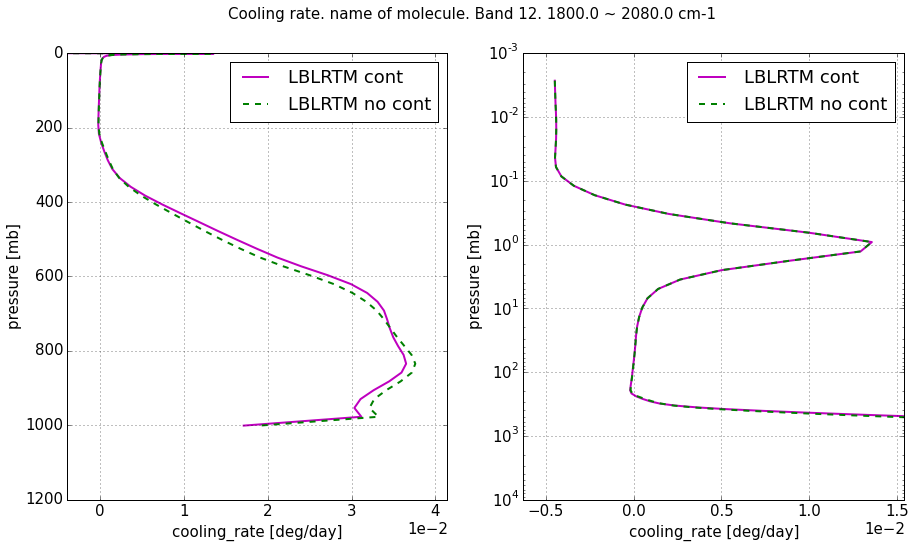


------------------------------------------------------------------------

RRTMG-LW. Spectral band 13. 2080.0 ~ 2250.0 cm-1

LBLRTM cont
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -1.362991   0.000000 -1.362991      0.000000
30   299.8000 -1.380199   0.001101 -1.379099     -0.000845
0   1013.0000 -1.639014   0.630223 -1.008791      0.018835

LBLRTM no cont
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -1.470747   0.000000 -1.470747      0.000000
30   299.8000 -1.471435   0.000242 -1.471193     -0.000070
0   1013.0000 -1.639014   0.455507 -1.183507      0.013219

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.107756   0.000000  0.107756      0.000000
30         0  0.091236   0.000859  0.092095     -0.000775
0          0  0.000000   0.174716  0.174716      0.005616



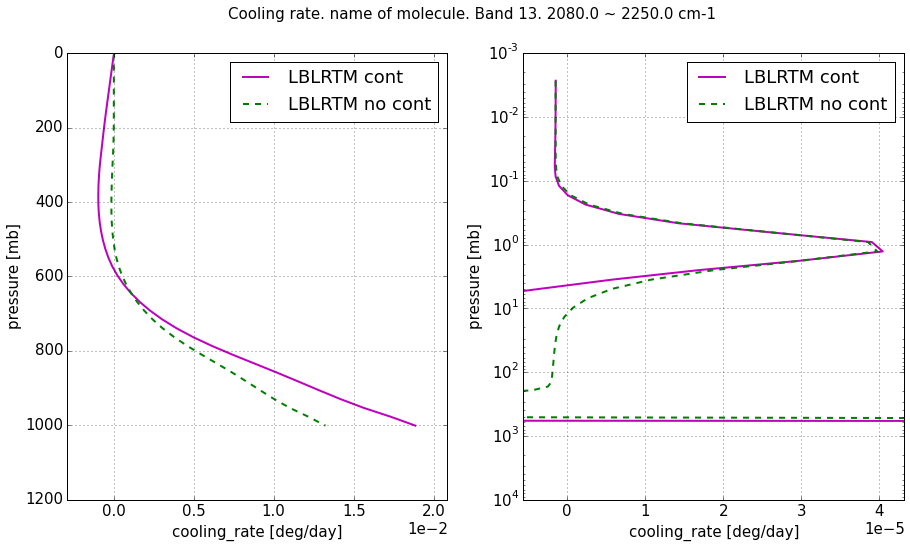


------------------------------------------------------------------------

RRTMG-LW. Spectral band 14. 2250.0 ~ 2380.0 cm-1

LBLRTM cont
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.471871   0.000000 -0.471871      0.000000
30   299.8000 -0.518131   0.002580 -0.515551     -0.002091
0   1013.0000 -0.731556   0.292221 -0.439335      0.007322

LBLRTM no cont
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.717038   0.000000 -0.717038      0.000000
30   299.8000 -0.717068   0.000003 -0.717065     -0.000005
0   1013.0000 -0.731556   0.046003 -0.685553      0.001722

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.245167   0.000000  0.245167      0.000000
30         0  0.198937   0.002577  0.201515     -0.002087
0          0  0.000000   0.246218  0.246218      0.005600



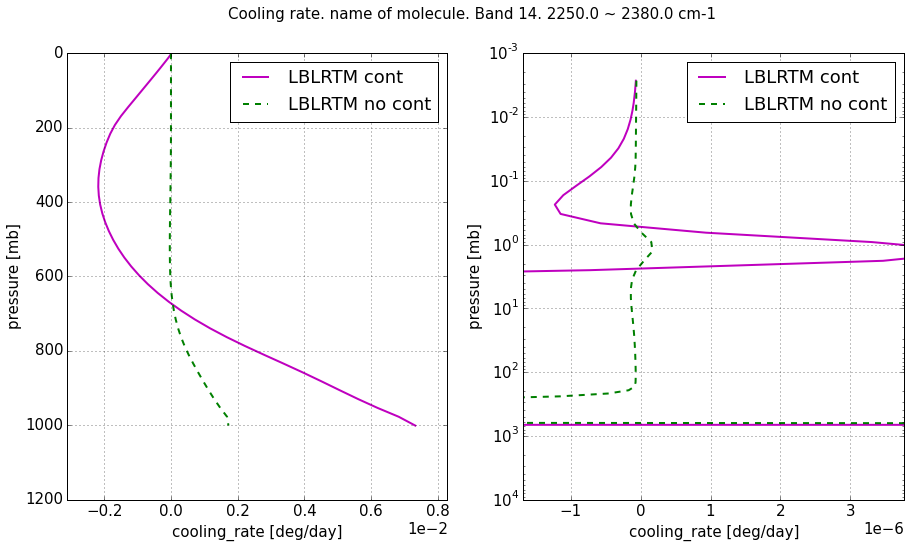


------------------------------------------------------------------------

RRTMG-LW. Spectral band 15. 2380.0 ~ 2600.0 cm-1

LBLRTM cont
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.526882   0.000000 -0.526882      0.000000
30   299.8000 -0.550620   0.001035 -0.549585     -0.001121
0   1013.0000 -0.665840   0.154193 -0.511647      0.004296

LBLRTM no cont
     pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.0024 -0.662192  0.000000e+00 -0.662192      0.000000
30   299.8000 -0.662207  7.552275e-07 -0.662206     -0.000002
0   1013.0000 -0.665840  8.842813e-03 -0.656997      0.000234

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.135309   0.000000  0.135309      0.000000
30         0  0.111587   0.001034  0.112621     -0.001119
0          0  0.000000   0.145350  0.145350      0.004061



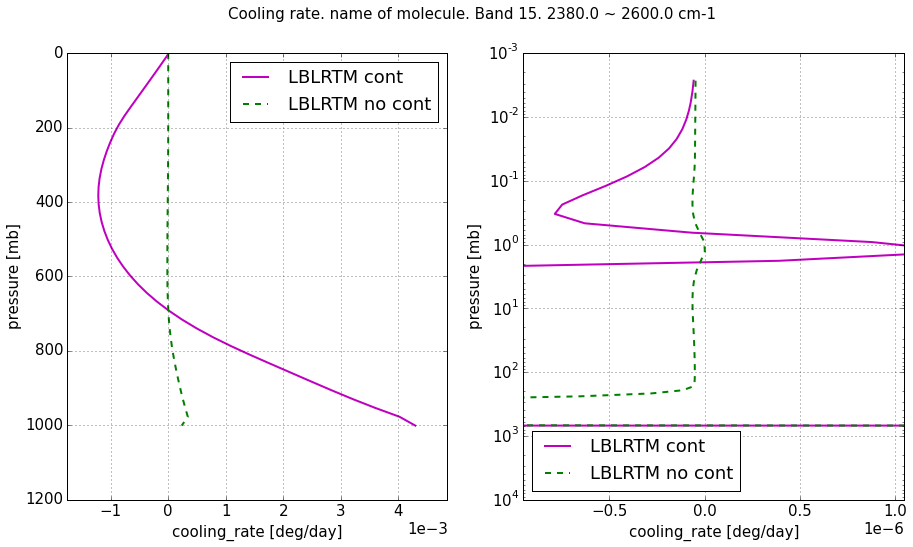


------------------------------------------------------------------------

RRTMG-LW. Spectral band 16. 2600.0 ~ 3250.0 cm-1

LBLRTM cont
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.362774   0.000000 -0.362774      0.000000
30   299.8000 -0.363104   0.000021 -0.363083     -0.000039
0   1013.0000 -0.403547   0.085403 -0.318144      0.002619

LBLRTM no cont
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.366088   0.000000 -0.366088      0.000000
30   299.8000 -0.366327   0.000019 -0.366308     -0.000034
0   1013.0000 -0.403547   0.075430 -0.328116      0.002112

LBLRTM cont - LBLRTM no cont
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.003314   0.000000  0.003314      0.000000
30         0  0.003223   0.000002  0.003225     -0.000005
0          0  0.000000   0.009972  0.009972      0.000507



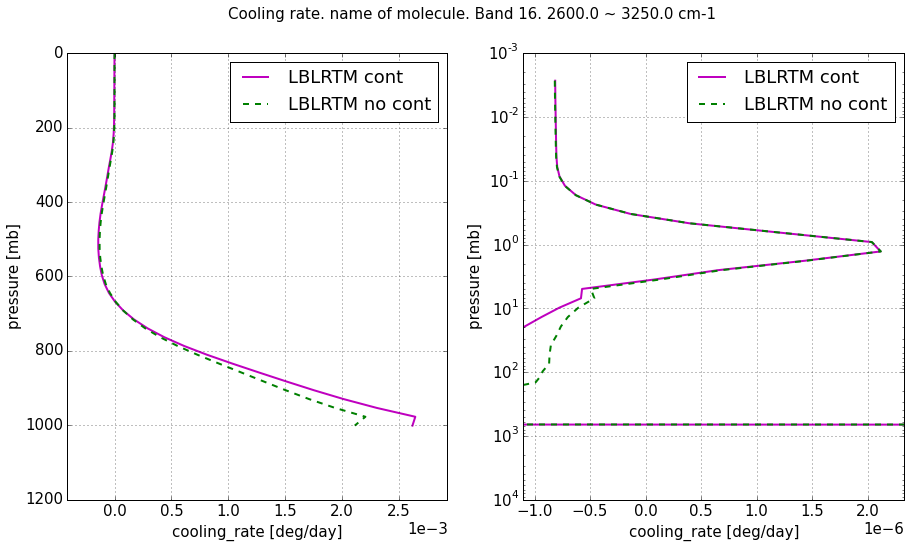


------------------------------------------------------------------------



In [19]:
print('Flux tables and cooling rates in RRTMG spectral bands')
print()
print()

scripts_intermodel.lw_results_by_rrtmg_bands(
    infos_lbl=[('LBLRTM cont', 'm', '-', pnl_lblrtm_cont),
               ('LBLRTM no cont', 'g', '--', pnl_lblrtm)])

In [21]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')